## Instructions

- Run all cells to initialize app (`Menu Bar > Kernel > Restart & Run All`)
- Select a system ID with data picker, text input, or key selection (see below)
- When ready, run SCSF algorithm by clicked red button (caution: this could take a few minutes to complete)
- Re-run last cell of notebook (`view_ts` function) after SCSF algorithm completes to look at close up of of 5 days in data set

In [1]:
%matplotlib notebook
from sys import path
path.append('..')
from clearsky.dataviewer import PointBrowser, load_results, load_sys, view_ts
df = load_results()

In [2]:
df = load_results()

# Year over year degradation analysis: results data viewer

The SCSF algorithm can be used to estimate the YOY degradation of a PV system from historical data, without the need for a physical system model. NREL also provides the [RdTools](https://www.nrel.gov/pv/rdtools.html) for estimating YOY degradation rates, which takes the classic approach, using a physical system model. Approximately 300 systems from around the US had their historical power data analysed by both tools. The applet presented here investigates these results, plotting the SCSF estimate versus the RdTools estimate for each system. When a point is selected in the top-left frame, the record for the two estimates is shown in the upper right. Each record has the following fields:

- `rd`: the RdTools YOY degradation estimate
- `deg`: the SCSF YOY degradation estimate
- `difference`: the difference between the RdTools estimate and the SCSF estimate
- `rd_range`: RdTools also provides quantile estimates on the YOY deg value. This is the P95 minus to P5 values. A larger range indicates larger uncertainty in the RdTools estimate.
- `res-median`: the median of the residuals between the SCSF clear sky estimate and the raw data
- `res-var`: the variance of the residuals between the SCSF clear sky estimate and the raw data
- `res-L0norm`: L0 refers to the first column vector in the L matrix of the GLR model. If the model is a good fit for the data, we expect this vector to look similar to the first left singular vector of the SVD of the data matrix. This field is the norm of the residual between the L0 vector and the first left singular vector. If it is small, these two vectors are similar, and if it large, they are dissimilar.
- `rd_low`: the P5 value of the RdTools estimate
- `rd_high`: the P95 value of the RdTools estimate
- `all-pass`: SCSF algorithm passed all three internal solver checks (should be `True` for all data presented here)
- `fix-ts`: this is `True` if the SCSF initialization method detected and fixed a timestamp shift issue
- `num-days`: the number of days available in that system's data set
- `num-days-used`: the number of days selected by the SCSF algorithm
- `use-frac`: the fraction of available days used by the algorithm

In the data selector pane, the orange points have one or more of the three SCSF residual metrics (`res-median`, `res-var`, and `res-L0norm`) in the top fifth percentile over all the data (i.e., at least one of the metrics is an outlier).

### Data selection

Individual systems may be selected by the following ways:

- click a point in the upper left plot
- enter a system ID number in the text box (applet pickes nearest used ID number)
- cycle through systems in descending order (from currently selected) with `a` key
- cycle through systems in ascending order (from currently selected) with `s` key

Once a system ID is selected, the raw time series power data is retreived from GISMo's servers and displayed in the second row. This data is cached in memory after retrieval, making repeated queries speedier.

Some interesting system IDs to check out:

- `31195` : a very clean, well-behaved system
- `29890` : jump in apparent capacity in first year, SCSF approach shows robustness
- `21167` : time shift in data, automatically detected and corrected by SCSF
- &nbsp;&nbsp;`5429` : tree growth on west side of PV system
- `18613` : an interesting shade pattern
- `34369` : another interesting shade pattern
- &nbsp;&nbsp;`1533` : almost no winter power output
- &nbsp;&nbsp;`2912` : very poor quality data
- `27133` : large inverter clipping, fit by SCSF (`clear_day_start=20`)
- `28532` : small inverter clipping, missed by SCSF (`clear_day_start=70`)

### Run SCSF Algorithm

After a system's data is loaded, you may press the red "run SCSF" button to execute the SCSF algorithm. The algorithm typically completes in 2-5 minutes, but occaisionally can take upwards of 10. Updates from the algorithm will be printed in the third row. This is replaced with a heatmap view of the clear sky estimate after the algorithm completes.

As soon as the algorithm is initialized (but before the minimization process) the daily energy and selected days are displayed in the bottom row. After the algorithm completes, this plot is updated with the estimated clear sky daily energy.

<IPython.core.display.Javascript object>


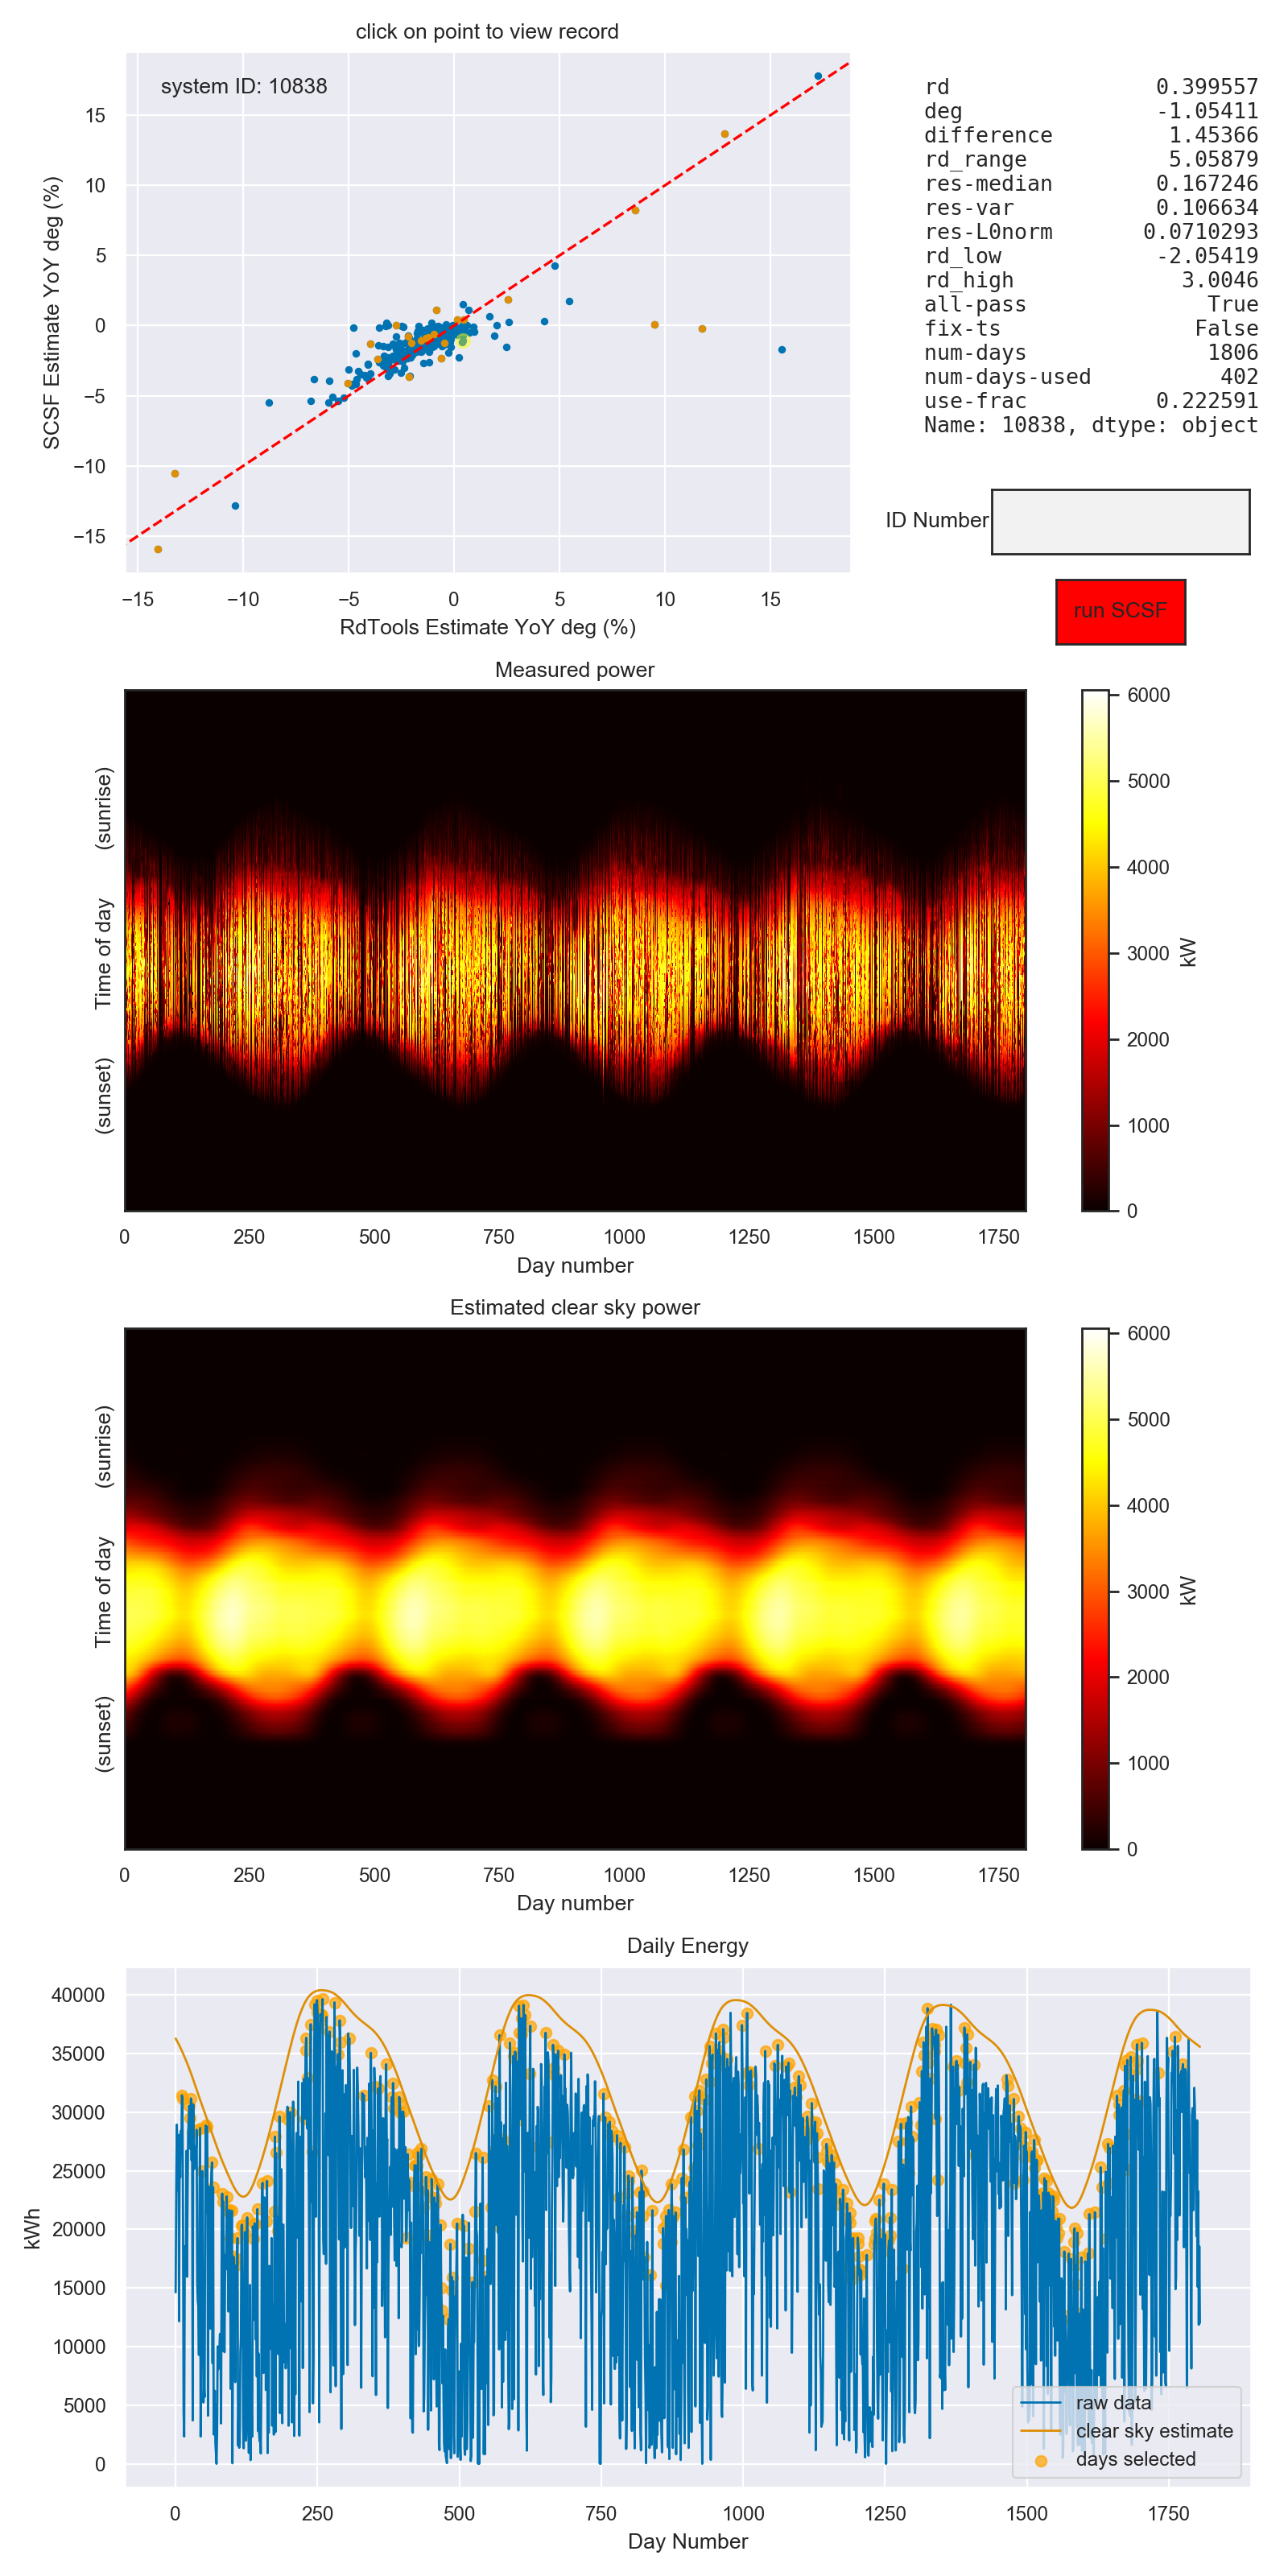

In [3]:
browser = PointBrowser(df)

NOTE: you can use the toolbar directly above to zoom and pan on the data picker plot (top-left). When you're done, click the tool a second time to turn it off, returning the "data picker' functionaliity to your cursor.

### Viewing results as time series

Run the following cell after running the SCSF algorithm on a loaded system data set in the previous cell. This brings up an interactive plot, showing the raw data, the clear sky estimate, and the daily weight value. Setting the `clear_day_start` keyword argument centers the plot on a clear day selected by the initialization method. If you set the `day_start` instead, the plot will start on that exact day number.

After runing the cell, try selecting the "pan axis" tool from the toolbar on the bottom and navigating around the data.

<IPython.core.display.Javascript object>


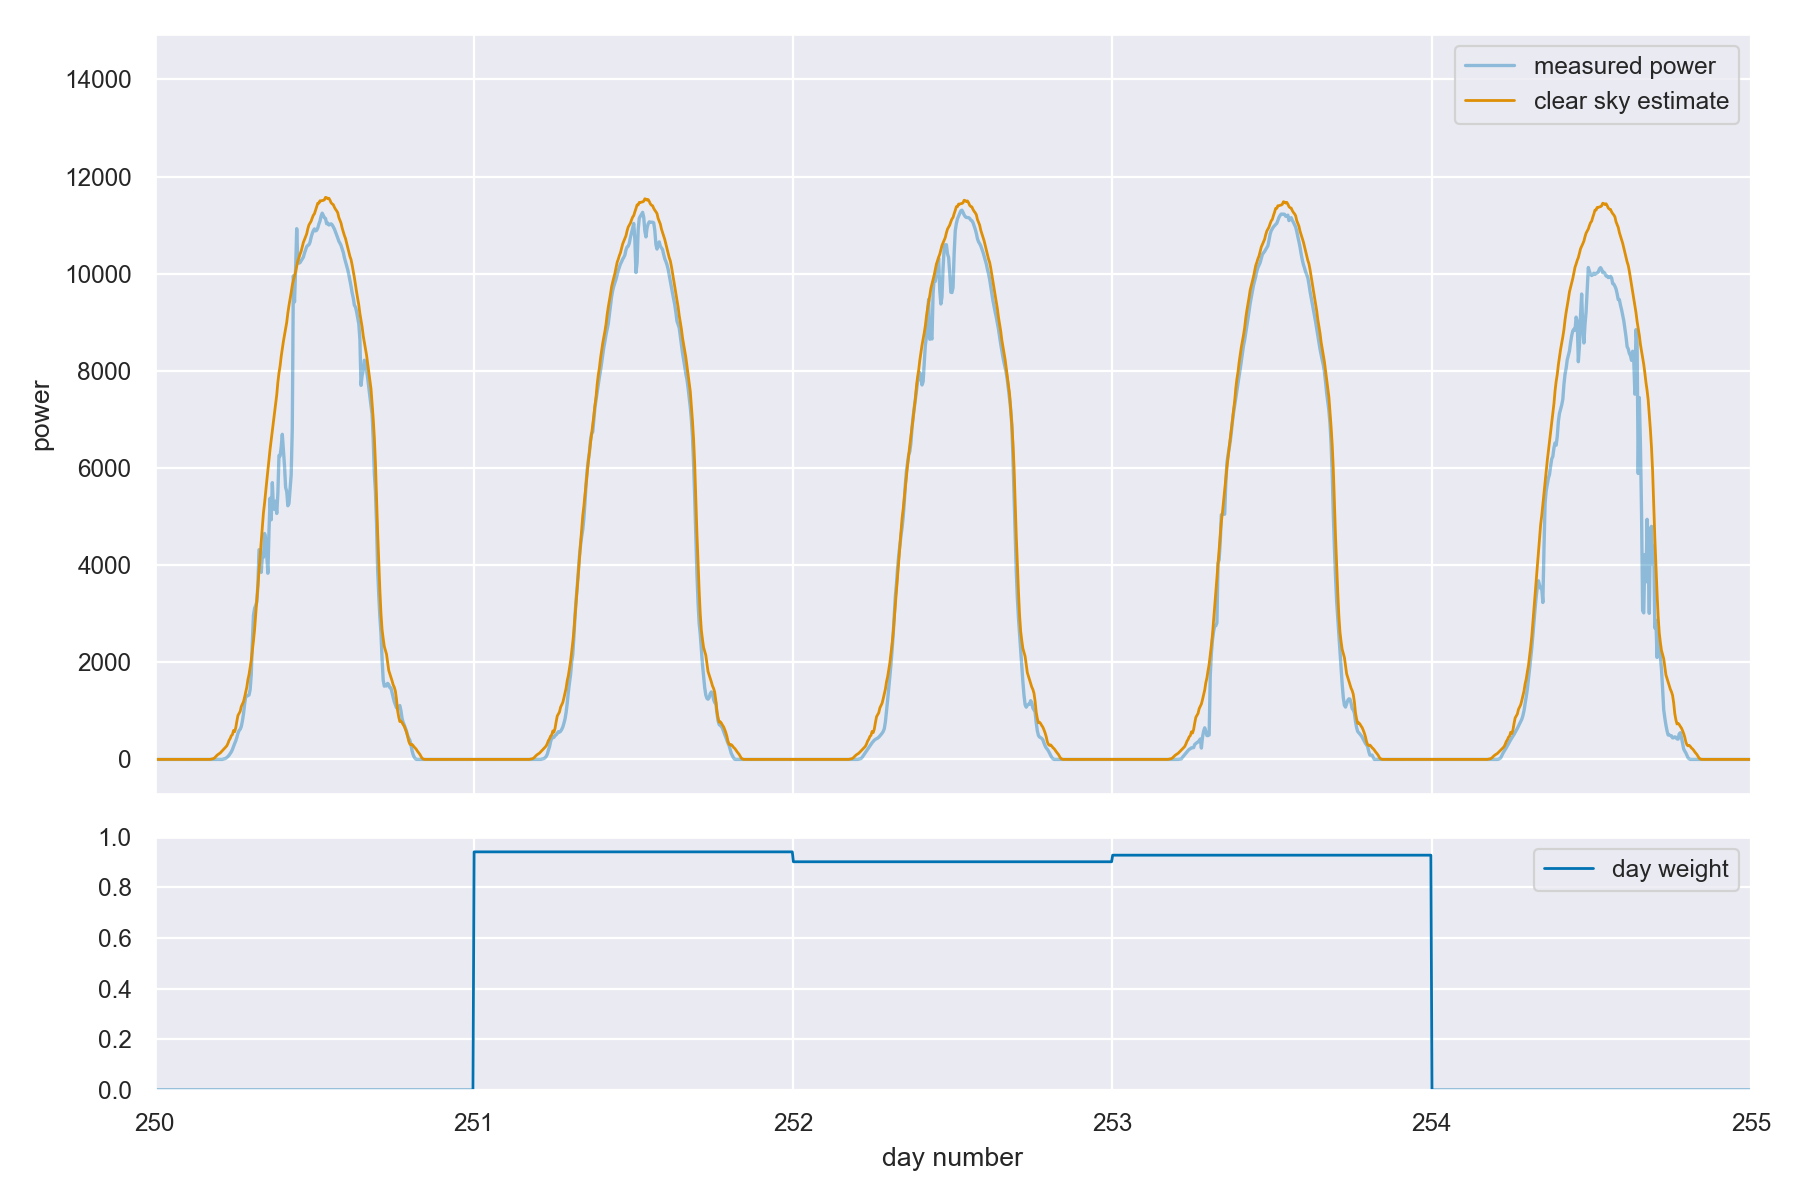

In [8]:
view_ts(browser, clear_day_start=80)